In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, json
os.chdir('/content/drive/My Drive/NRP 2020/')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1CqlR2wQDEuX_zgONX3N_3PuSOHWOblsA/NRP 2020


In [ ]:
#used to test if the bounding boxes are interpreted correctly...

from skimage import io
import cv2
import matplotlib.pyplot as plt
from numpy import array
def plot_bbox(img_url,boxes):#boxes is a list of [x1,y1,x2,y2]
  img = io.imread(img_url)
  if len(img.shape)==2:#greyscale image...
    full=[]
    for i in range(len(img)):
      row=[]
      for j in range(len(img[i])):
        row.append((img[i,j],img[i,j],img[i,j]))
      full.append(row)
    img=array(full)
  #height, width, channel = img.shape
  print(f"Image: {img.shape}")
  for (xmin,ymin,xmax,ymax) in boxes:
      class_name='Table'
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

# ICDAR 2013

In [ ]:
f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation.txt','w')

icdar_2013_gt='/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_gt_jpg'
icdar_2013_img='/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images'

for region in ['us','eu']:
  imgs=os.listdir(icdar_2013_img+'/training/'+region)
  labels=os.listdir(icdar_2013_gt+'/training/'+region)
  for i in labels:
    image=i[:-9]+'.jpg'
    file=open('/'.join([icdar_2013_gt,'training',region,i]))
    data=json.load(file)
    file.close()

    for table in data:
      #plot_bbox('/'.join([icdar_2013_img,'training',region,image]),[[table['x1'],table['y1'],table['x2'],table['y2']]])
      for key in table:
        table[key]=str(table[key])
      f.write('/'.join([icdar_2013_img,'training',region,image])+',')
      f.write(','.join([table['x1'],table['y1'],table['x2'],table['y2'] ]) )
      f.write(',Table\n')

f.close()

In [ ]:
f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation_test_with_icdar2013.txt','w')

icdar_2013_gt='/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_gt_jpg'
icdar_2013_img='/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images'

for region in ['us','eu']:
  imgs=os.listdir(icdar_2013_img+'/eval/'+region)
  labels=os.listdir(icdar_2013_gt+'/eval/'+region)
  labels.sort()
  for i in labels:
    image=i[:-9]+'.jpg'
    file=open('/'.join([icdar_2013_gt,'eval',region,i]))
    data=json.load(file)
    file.close()
  
    for table in data:
      for key in table:
        table[key]=str(table[key])
      f.write('/'.join([icdar_2013_img,'eval',region,image])+',')
      f.write(','.join([table['x1'],table['y1'],table['x2'],table['y2'] ]) )
      f.write(',Table\n')

f.close()

print('ok')

ok


#ICDAR 2019

In [ ]:
from xml.dom import minidom

#training

f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation_with_icdar2019.txt','a')

icdar_2019_dir='/content/drive/My Drive/NRP 2020/original/ICDAR2019_cTDaR-master/training'

cnt=0
for img_type in ['TRACKA']:#ignore trackB1, since it's for structure recognition purposes...
  cur_path=icdar_2019_dir+'/'+img_type+'/ground_truth'
  files=os.listdir(cur_path)
  files.sort()
  for i in range(len(files)//2):#.jpg comes before .xml
    img_path='/'.join([cur_path,files[i*2]])
    doc=minidom.parse('/'.join([cur_path,files[i*2 +1]] ) )

    coords_elements=doc.getElementsByTagName('Coords')
    for element in coords_elements:
      coords=(element.attributes['points'].value).split(' ')
      xx=[]
      yy=[]
      for i in range(4):#each coord...
        coords[i]=[int(number) for number in coords[i].split(',')]
        xx.append(coords[i][0])
        yy.append(coords[i][1])
      xmin=min(xx)
      xmax=max(xx)
      ymin=min(yy)
      ymax=max(yy)

      points=[xmin,ymin,xmax,ymax ]
      str_points=[str(num) for num in points]
      f.write(img_path+',')
      f.write(','.join(str_points) )
      f.write(',Table\n')
      
      '''cnt+=1
      plot_bbox(img_path,[points])
      if cnt>5:
        raise Exception('nah')'''

f.close()

In [ ]:
from xml.dom import minidom

#testing

f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation_test_with_icdar2019.txt','w')

icdar_2019_img='/content/drive/My Drive/NRP 2020/original/ICDAR2019_cTDaR-master/test/TRACKA'#a is for table recognition, b1 for structure recognition, b2 for combined
icdar_2019_gt='/content/drive/My Drive/NRP 2020/original/ICDAR2019_cTDaR-master/test_ground_truth/'

cnt=0
for img_type in ['TRACKA']:#ignore trackB1, since it's for structure recognition purposes...
  cur_path=icdar_2019_gt+'/'+img_type
  files=os.listdir(cur_path)
  files.sort()
  for file in files:#iterate through .xml files since they mention the jpg file anyway
    doc=minidom.parse('/'.join([cur_path,file] ) )
    img_file=doc.getElementsByTagName('document')[0].attributes['filename'].value
    img_path='/'.join([icdar_2019_img,img_file])

    coords_elements=doc.getElementsByTagName('Coords')
    for element in coords_elements:
      coords=(element.attributes['points'].value).split(' ')
      xx=[]
      yy=[]
      for i in range(4):#each coord...
        coords[i]=[int(number) for number in coords[i].split(',')]
        xx.append(coords[i][0])
        yy.append(coords[i][1])
      xmin=min(xx)
      xmax=max(xx)
      ymin=min(yy)
      ymax=max(yy)

      points=[xmin,ymin,xmax,ymax ]
      str_points=[str(num) for num in points]
      f.write(img_path+',')
      f.write(','.join(str_points) )
      f.write(',Table\n')
      
      '''cnt+=1
      plot_bbox(img_path,[points])
      if cnt>5:
        raise Exception('nah')'''

f.close()

# UNLV

In [ ]:
#training

f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation_with_unlv.txt','a')

cur_dir='/content/drive/My Drive/NRP 2020/original/UNLV/table_data'

csv=open('/'.join([cur_dir,'train.csv']),'r')
lines=csv.readlines()
csv.close()

lines.sort()

cnt=0
for line in lines:
  data=line.split(',')
  points=data[1:5]
  f.write('/'.join([cur_dir,'images',data[0]])+',')#filename,x1,y1,x2,y2,table
  f.write(','.join(points) )
  f.write(',Table\n')

  points= [int(point) for point in points]
  '''plot_bbox('/'.join([cur_dir,'images',data[0]]),[points]  )
  cnt+=1
  if cnt>=5:
    break'''

f.close()

In [ ]:
#validation

f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation_test_with_unlv.txt','w')

cur_dir='/content/drive/My Drive/NRP 2020/original/UNLV/table_data'

csv=open('/'.join([cur_dir,'val.csv']),'r')
lines=csv.readlines()
csv.close()

lines.sort()

cnt=0
for line in lines:
  data=line.split(',')
  points=data[1:5]
  f.write('/'.join([cur_dir,'images',data[0]])+',')#filename,x1,y1,x2,y2,table
  f.write(','.join(points) )
  f.write(',Table\n')

  points= [int(point) for point in points]
  '''plot_bbox('/'.join([cur_dir,'images',data[0]]),[points]  )
  cnt+=1
  if cnt>=5:
    break'''

f.close()

# Testing purposes...

In [ ]:
# f=open('/content/drive/My Drive/AI/Faster_RCNN/table_annotation_test_with_unlv.txt','r')
# print(len(f.readlines()))
# f.close()

971


3300 2560


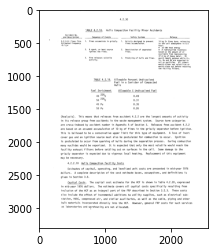

In [ ]:
# img = io.imread('/content/drive/My Drive/NRP 2020/original/UNLV/table_data/images/0147_125.png')

# full=[]
# for i in range(len(img)):
#   row=[]
#   for j in range(len(img[i])):
#     row.append((img[i,j],img[i,j],img[i,j]))
#   full.append(row)

# img=array(full)

# print(len(img),len(img[0]))

# plt.imshow(img)
# plt.show()